# Air Quality Visualization

### Plot daily average


## 1.Clean the data

In [221]:
library(sqldf)

In [222]:
airq<-read.csv("nan_daily.csv")
colnames(airq)<-c("id","y","m","d","doy","avgtemp","avghumid","avgpm1","avgpm25","avgpm10")
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10
CU-S0002,2017,12,19,353,23.43540,49.99668,23.26577,32.72790,38.25850
CU-S0003,2017,12,19,353,25.70972,46.53146,24.36043,33.48631,38.78230
CU-S00104,2017,12,19,353,24.23856,48.89625,25.43719,35.95088,42.38004
CU-S0014,2017,12,19,353,22.67982,50.57453,21.22252,29.24646,35.08134
CU-S0020,2017,12,19,353,21.19115,52.03709,22.85619,32.15103,38.41735
CU-S0022,2017,12,19,353,26.03685,41.17490,21.48007,29.60350,34.35105


In [223]:
sensorlist<-read.csv("sensorlist.csv",encoding="UTF-8", stringsAsFactors=FALSE)
sensorlist[]     <- lapply(sensorlist, as.character)
Encoding(sensorlist$tambol)

[1] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[10] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[19] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[28] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[37] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[46] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[55] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[64] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[73] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[82] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"
[91] "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8" "UTF-8"

In [224]:
airq$avgtemp <- airq$avgtemp-5
airq$avghumid <- airq$avghumid+6
airq$avgpm25 <- airq$avgpm25/0.8
airq$avgpm10 <- airq$avgpm10/0.5

In [225]:
airq<-sqldf("select a.*,s.tambol,s.amphoe from airq a, sensorlist s where a.id=s.sensorid")

In [226]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe
CU-S0002,2017,12,19,353,18.43540,55.99668,23.26577,40.90987,76.51699,<U+0E1A><U+0E48><U+0E2D><U+0E41><U+0E01><U+0E49><U+0E27>,<U+0E19><U+0E32><U+0E2B><U+0E21><U+0E37><U+0E48><U+0E19>
CU-S0003,2017,12,19,353,20.70972,52.53146,24.36043,41.85788,77.56460,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>
CU-S00104,2017,12,19,353,19.23856,54.89625,25.43719,44.93860,84.76007,<U+0E40><U+0E0A><U+0E35><U+0E22><U+0E07><U+0E02><U+0E2D><U+0E07>,<U+0E19><U+0E32><U+0E19><U+0E49><U+0E2D><U+0E22>
CU-S0014,2017,12,19,353,17.67982,56.57453,21.22252,36.55808,70.16268,<U+0E1E><U+0E23><U+0E30><U+0E1E><U+0E38><U+0E17><U+0E18><U+0E1A><U+0E32><U+0E17>,<U+0E40><U+0E0A><U+0E35><U+0E22><U+0E07><U+0E01><U+0E25><U+0E32><U+0E07>
CU-S0020,2017,12,19,353,16.19115,58.03709,22.85619,40.18879,76.83470,<U+0E17><U+0E38><U+0E48><U+0E07><U+0E0A><U+0E49><U+0E32><U+0E07>,<U+0E17><U+0E38><U+0E48><U+0E07><U+0E0A><U+0E49><U+0E32><U+0E07>
CU-S0022,2017,12,19,353,21.03685,47.17490,21.48007,37.00437,68.70210,<U+0E17><U+0E48><U+0E32><U+0E27><U+0E31><U+0E07><U+0E1C><U+0E32>,<U+0E17><U+0E48><U+0E32><U+0E27><U+0E31><U+0E07><U+0E1C><U+0E32>


Create text month

In [227]:
airq$monthf<-factor(airq$m,levels=as.character(1:12),labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),ordered=TRUE)

Create date format column from y m d

In [228]:
airq$date<-as.Date(paste(airq$y,"-",airq$m,"-",airq$d,sep=""))

Find week of year for each day

In [229]:
airq$woy<-as.numeric(format(airq$date,"%W"))

Then for each monthblock we normalize the week to start at 1

In [230]:
library(plyr)

In [231]:
airq<-ddply(airq,.(m),transform,monthweek=1+woy-min(woy))

Create day of week (dow) column

In [232]:
airq$dow<-as.POSIXlt(airq$date)$wday

In [233]:
library(ggplot2)

Check dow

In [234]:
min(airq$dow)
max(airq$dow)

[1] 0

[1] 6

Create day of week text (dowf) column. We will use it in the plot. 

In [235]:
airq$dowf<-factor(airq$dow,levels=rev(0:6),labels=rev(c("Sun","Mon","Tue","Wed","Thu","Fri","Sat")),ordered=TRUE)

In [236]:
max(airq$monthweek)
min(airq$monthweek)

[1] 6

[1] 1

Check the result

In [237]:
sqldf('select * from airq where m=1 and id="CU-S0003"')

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,tambol,amphoe,monthf,date,woy,monthweek,dow,dowf
CU-S0003,2017,1,1,1,21.22564,66.78534,24.480435,42.315707,78.22467,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-01,0,1,0,Sun
CU-S0003,2017,1,2,2,23.98399,66.02772,13.509759,21.237634,36.21214,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-02,1,2,1,Mon
CU-S0003,2017,1,3,3,24.57416,64.02827,12.765383,20.079004,34.70528,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-03,1,2,2,Tue
CU-S0003,2017,1,4,4,21.90557,65.84468,12.839933,21.211851,38.37267,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-04,1,2,3,Wed
CU-S0003,2017,1,5,5,20.17165,72.08777,4.721033,7.021876,11.94728,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-05,1,2,4,Thu
CU-S0003,2017,1,6,6,20.76541,72.17984,6.090636,9.335108,15.91699,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-06,1,2,5,Fri
CU-S0003,2017,1,7,7,22.99230,68.01024,7.578818,11.745253,20.14260,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-07,1,2,6,Sat
CU-S0003,2017,1,8,8,23.72287,60.82860,15.964473,26.338048,47.91771,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-08,1,2,0,Sun
CU-S0003,2017,1,9,9,23.18391,65.78172,15.814282,25.441337,46.52040,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-09,2,3,1,Mon
CU-S0003,2017,1,10,10,22.85655,71.87230,20.746444,33.500446,59.11664,<U+0E40><U+0E08><U+0E14><U+0E35><U+0E22><U+0E4C><U+0E0A><U+0E31><U+0E22>,<U+0E1B><U+0E31><U+0E27>,Jan,2017-01-10,2,3,2,Tue


## 2. Use ggplot to create heatmap

Check min and max of temperature

In [238]:
min(airq$avgtemp)
max(airq$avgtemp)

[1] 11.95

[1] 337991751

Convert temp into categorical data by cutting it into chunks.

In [239]:
maxtemp<-max(airq$avgtemp)
airq$tempcat<-cut(airq$avgtemp,c(0,10,20,30,40,max(airq$avgtemp)))

Try plotting

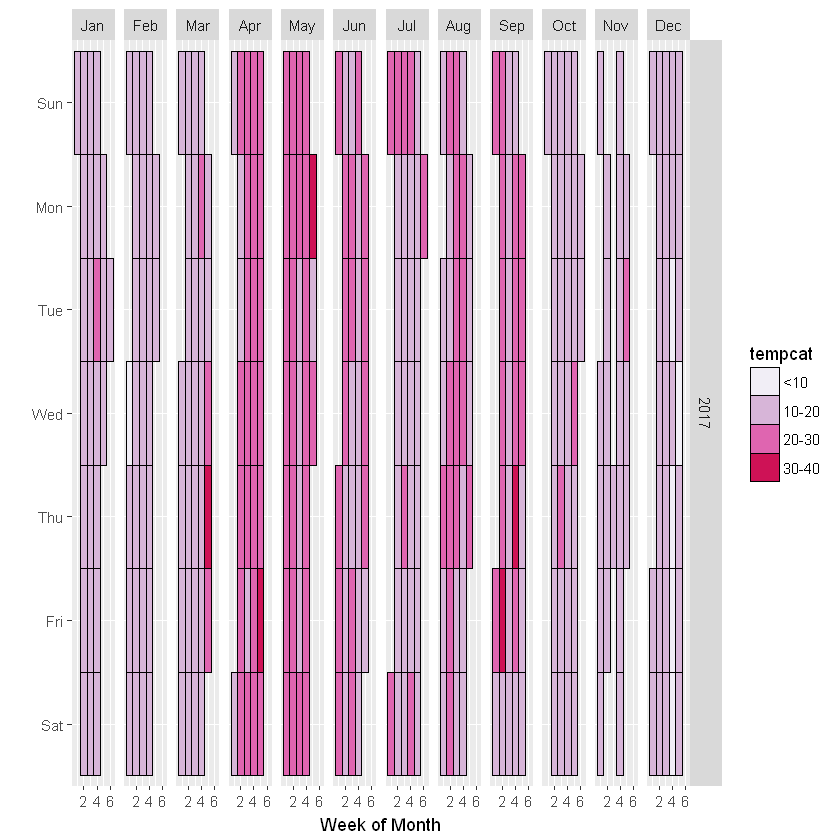

In [240]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "black") + scale_fill_brewer(palette = "PuRd",labels = c("<10", "10-20", "20-30","30-40",">=40"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

There are temp more than 50 which are impossible. If the data is more than 50, mark it as invalid.

In [241]:
maxtemp<-max(airq$avgtemp)
airq$tempcat<-cut(airq$avgtemp,c(0,10,20,30,40,50,max(airq$avgtemp)))

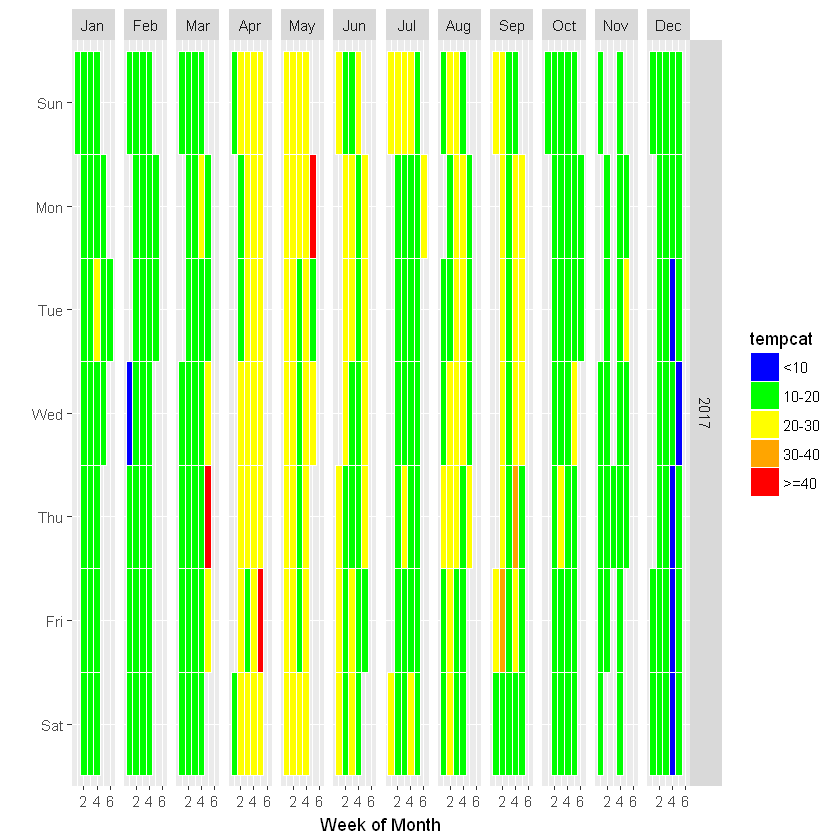

In [242]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_manual(values=c("blue","green","yellow","orange","red","grey"),labels = c("<10", "10-20", "20-30","30-40",">=40","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Something wrong with the color--very high value was assigned to 30-40 degree. Try to average the data manually.

In [243]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgtemp) from airq group by y,doy')

In [244]:
colnames(airqdaily)[6]<-"avgtemp"
maxtemp<-max(airqdaily$avgtemp)
airqdaily$tempcat<-cut(airqdaily$avgtemp,c(0,10,20,30,40,50,max(airqdaily$avgtemp)))

Please check the number of classes before assign the color. If the number of color is more than the number of class, false assigning occurred

In [245]:
sqldf('select distinct(tempcat) from airqdaily')

tempcat
"(20,30]"
"(30,40]"
"(50,7.56e+06]"


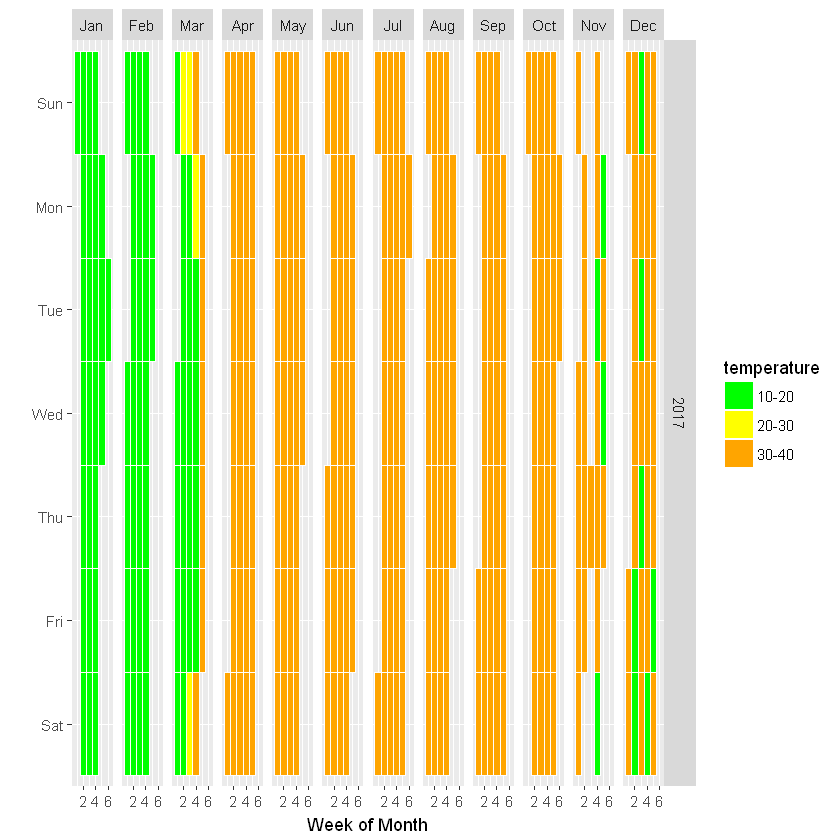

In [246]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_manual(guide = guide_legend(title = "temperature"),values=c("green","yellow","orange","grey"),labels = c("10-20","20-30","30-40","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Now,visualize humidity

In [247]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avghumid) from airq group by y,doy')
colnames(airqdaily)[6]<-"avghumid"
maxhumid<-max(airqdaily$avghumid)
airqdaily$humidity<-cut(airqdaily$avghumid,c(0,20,30,50,80,maxhumid))

In [248]:
sqldf('select distinct(humidity) from airqdaily')

humidity
"(50,80]"
"(80,8.06e+06]"
"(30,50]"


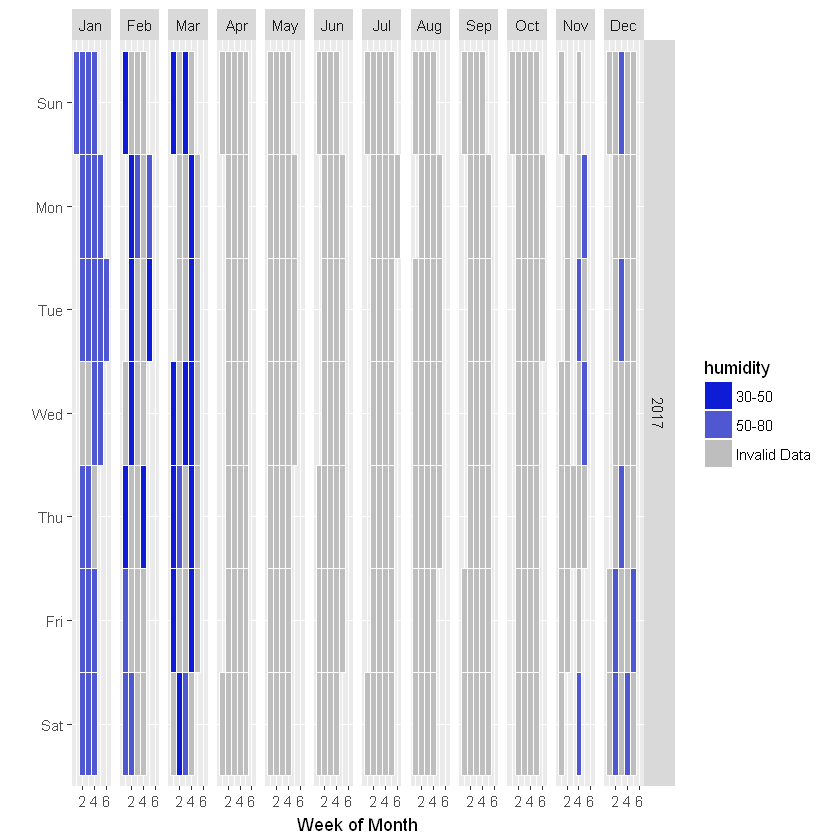

In [249]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = humidity),colour = "white") + scale_fill_manual(values=c("#0e1cd6","#4f58d1","grey"),labels = c("30-50","50-80","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Visualze pm1

In [250]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm1) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm1"
maxpm1<-max(airqdaily$avgpm1)
airqdaily$pm1<-cut(airqdaily$avgpm1,c(0,50,120,200,300,maxpm1))

In [251]:
sqldf('select distinct(pm1) from airqdaily')

pm1
"(0,50]"
"(50,79.8]"


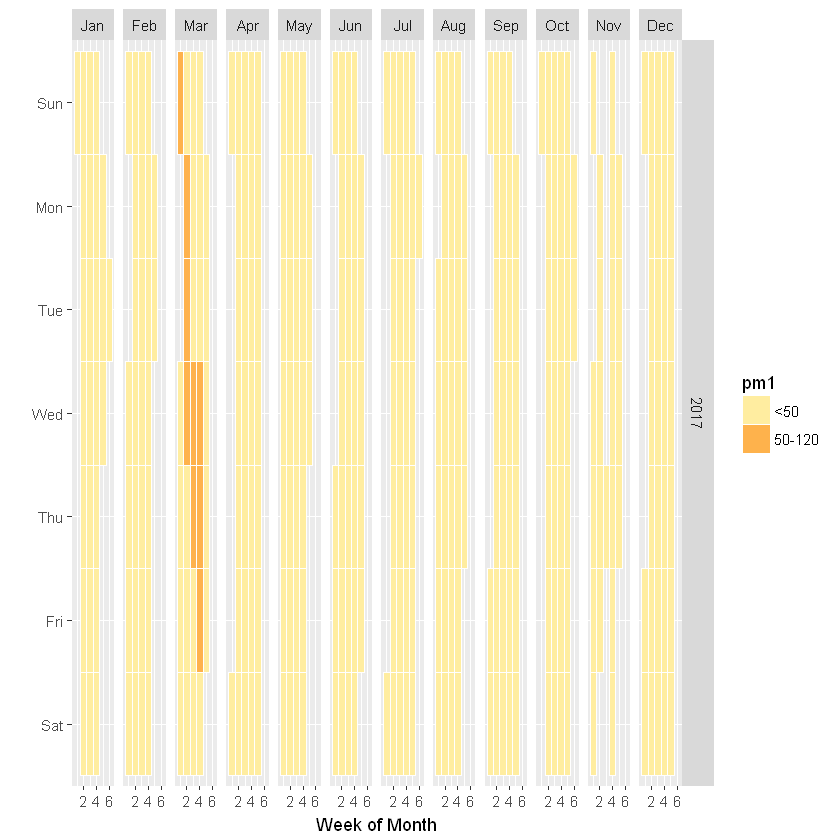

In [252]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm1),colour = "white") + scale_fill_manual(values=c("#ffeda0","#feb24c"),labels = c("<50","50-120"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

visualize pm2.5

In [253]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm25) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm25"
maxpm25<-max(airqdaily$avgpm25)
airqdaily$pm25<-cut(airqdaily$avgpm25,c(0,50,120,200,300,maxpm25))

In [254]:
sqldf('select distinct(pm25) from airqdaily')

pm25
"(0,50]"
"(50,120]"
"(120,132]"


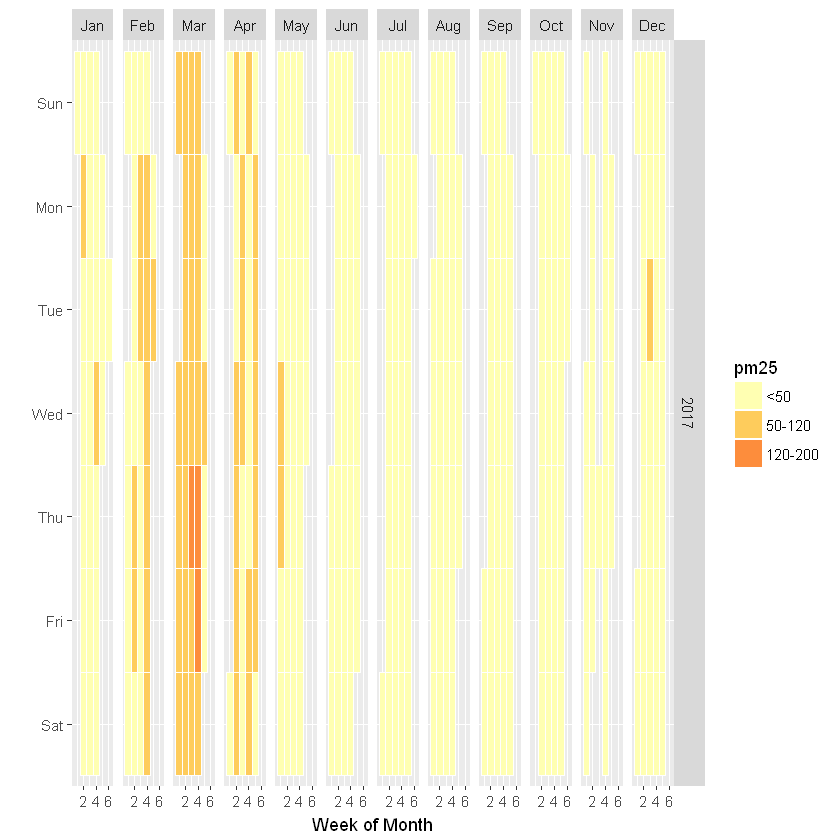

In [255]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm25),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c"),labels = c("<50","50-120","120-200"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

visualize pm10

In [301]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm10) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm10"
maxpm10<-max(airqdaily$avgpm10)
airqdaily$pm10<-cut(airqdaily$avgpm10,c(0,50,100,200,300,maxpm10))

In [303]:
sqldf('select distinct(pm10) from airqdaily')

pm10
"(50,100]"
"(100,200]"
"(0,50]"
"(200,228]"


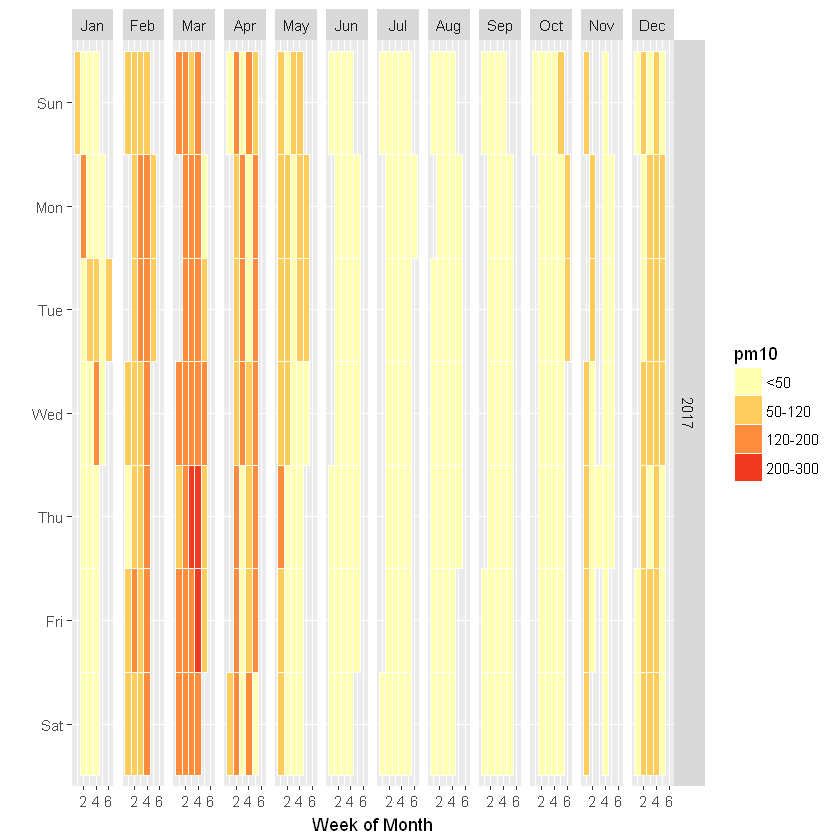

In [304]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm10),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","grey"),labels = c("<50","50-120","120-200","200-300",">300"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

In [305]:
airq$pm1cat<-cut(airq$avgpm1,c(0,50,120,200,300),include.lowest=TRUE)
sqldf('select distinct(pm1cat) from airq')

pm1cat
"[0,50]"
"(200,300]"
"(120,200]"
"(50,120]"


In [306]:
airq$pm25cat<-cut(airq$avgpm25, breaks=c(0, 15, 40, 65, 150, max(airq$avgpm25)), include.lowest=TRUE)
sqldf('select distinct(pm25cat) from airq')

pm25cat
"(15,40]"
"[0,15]"
"(40,65]"
"(150,1.13e+03]"
"(65,150]"


In [307]:
airq[is.na(airq$pm25cat),]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,...,woy,monthweek,dow,dowf,tempcat,pm1cat,pm25cat,pm10cat,my,humidcat


In [308]:
airq$pm10cat<-cut(airq$avgpm10, breaks=c(0, 50, 100, 200, 300, max(airq$avgpm10)), include.lowest=TRUE)
sqldf('select distinct(pm10cat) from airq')

pm10cat
"[0,50]"
"(50,100]"
"(100,200]"
"(300,3.97e+03]"
"(200,300]"


In [309]:
airq$my<-paste(airq$m,airq$y,sep='-')

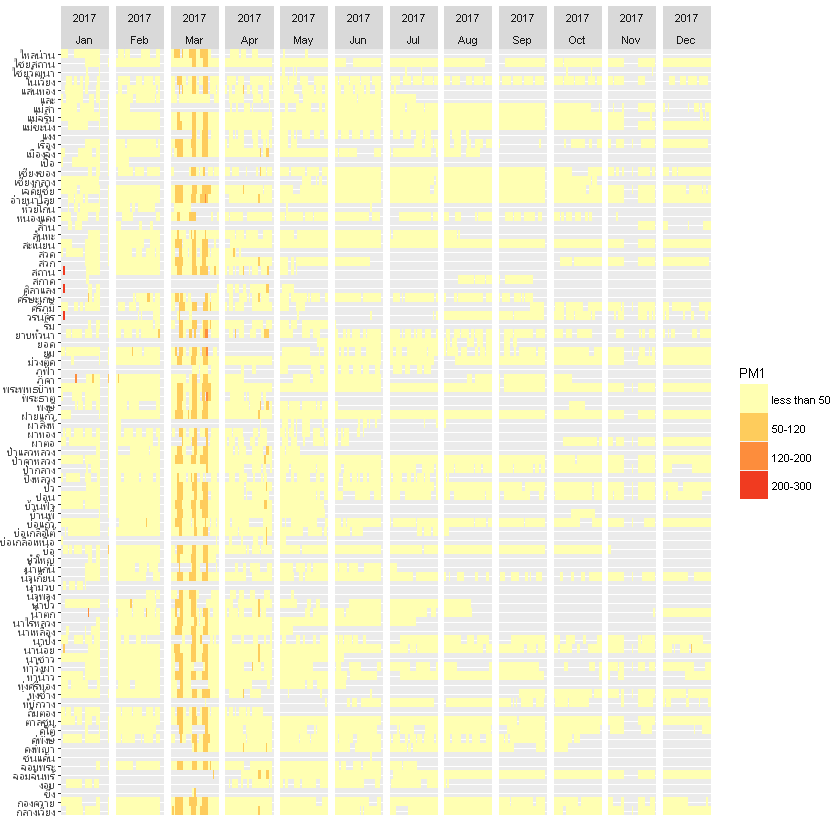

In [310]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM1"),values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
base_size<-8
p+theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

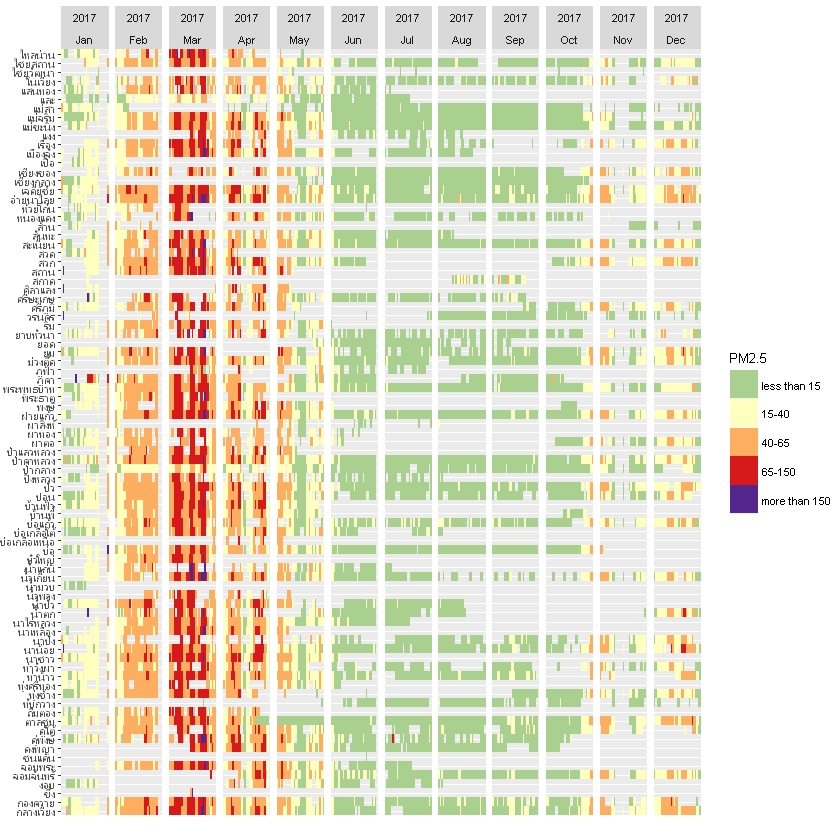

In [311]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM2.5"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 15","15-40","40-65","65-150","more than 150"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

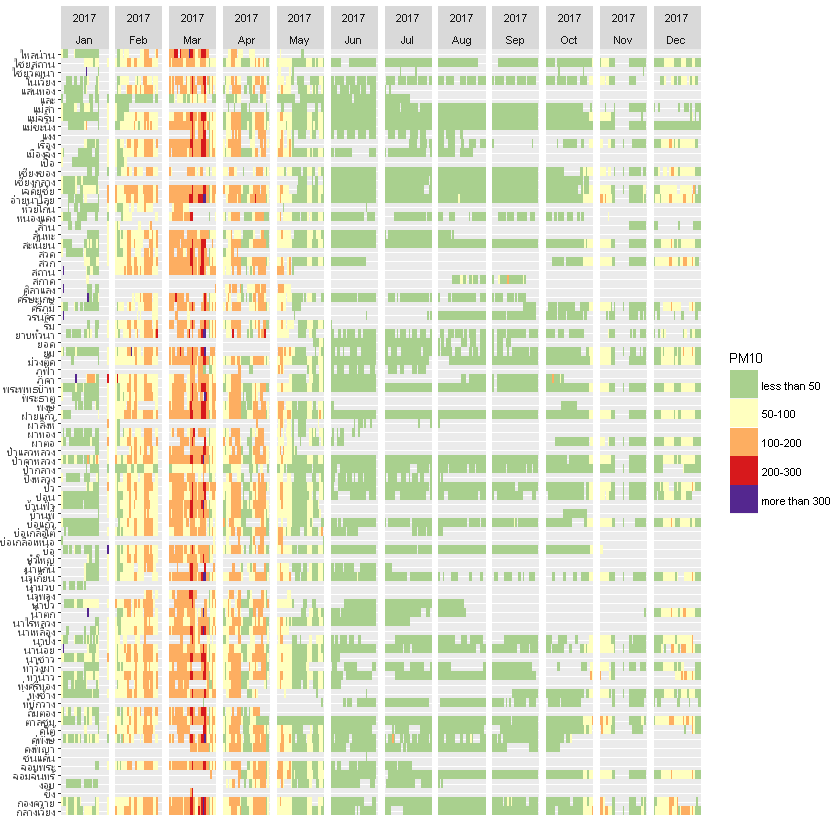

In [347]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "PM10"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 50","50-100","100-200","200-300","more than 300"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

In [313]:
sqldf('select distinct(tempcat) from airq')

tempcat
"(10,20]"
"(20,30]"
"(30,40]"
"(40,50]"
"(50,3.38e+08]"


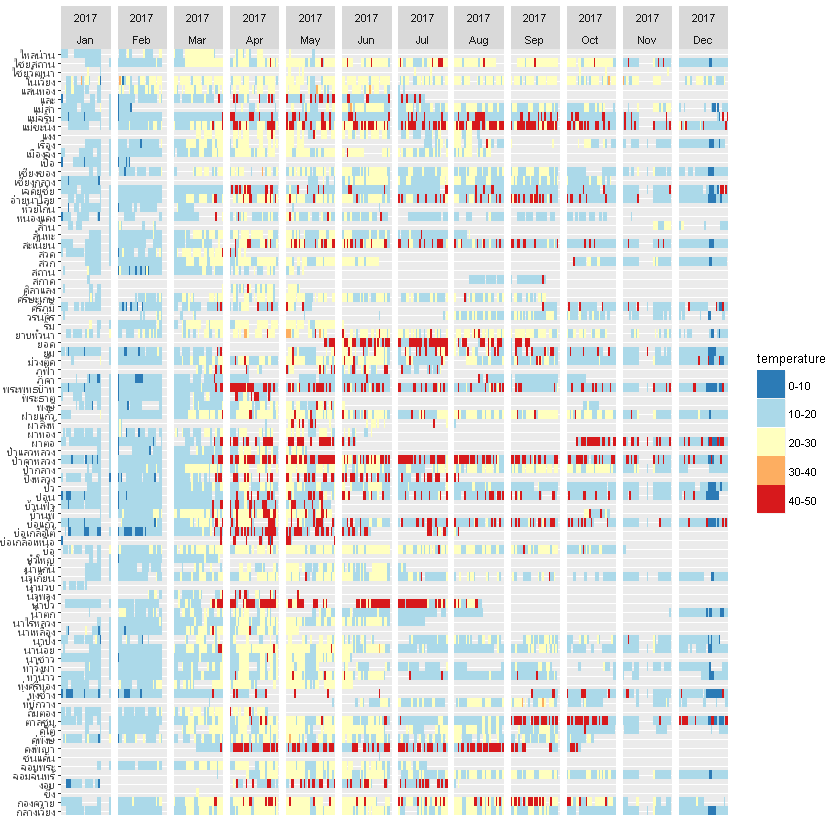

In [314]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = tempcat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "temperature"),values=c("#2c7bb6","#abd9e9","#ffffbf","#fdae61","#d7191c","grey"),labels = c("0-10","10-20","20-30","30-40","40-50","Invalid Data"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

In [315]:
airq$humidcat<-cut(airq$avghumid, breaks=c(0, 20, 30, 50, 80, max(airq$avghumid)), include.lowest=TRUE)
sqldf('select distinct(humidcat) from airq')

humidcat
"(50,80]"
"(30,50]"
"(80,3.18e+08]"
"[0,20]"
"(20,30]"


In [316]:
levels(airq$tambol)

NULL

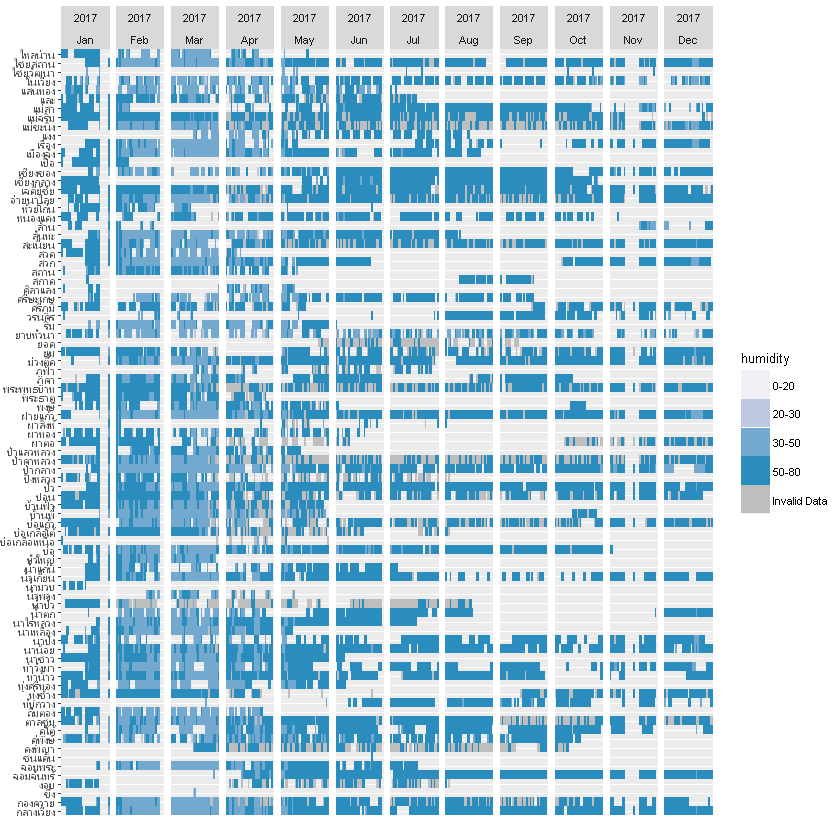

In [317]:
p<-ggplot(airq, aes(d,tambol)) +geom_tile(aes(fill = humidcat))+facet_grid(.~ y+monthf)+ scale_fill_manual(guide = guide_legend(title = "humidity"),values=c("#f1eef6","#bdc9e1","#74a9cf","#2b8cbe","grey"),labels = c("0-20","20-30","30-50","50-80","Invalid Data"))
base_size<-8
p +theme_grey(base_size = base_size) + labs(x = "",y = "") + scale_x_discrete(expand = c(0, 0)) +
scale_y_discrete(expand = c(0, 0))

In [352]:
subairq<-sqldf('select * from airq where m=3')

Plot only March data

Set up color scale

In [354]:
cc2.5 <- scale_fill_manual(guide = guide_legend(title = "PM2.5"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 15","15-40","40-65","65-150","more than 150"))
cc10 <- scale_fill_manual(guide = guide_legend(title = "PM10"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 50","50-100","100-200","200-300","more than 300"))

In [319]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(guide = guide_legend(title = "PM2.5"),values=c("#A9D08E","#ffffbf","#fdae61","#d7191c","#54278f"),labels = c("less than 15","15-40","40-65","65-150","more than 150"))

Saving 6.67 x 6.67 in image


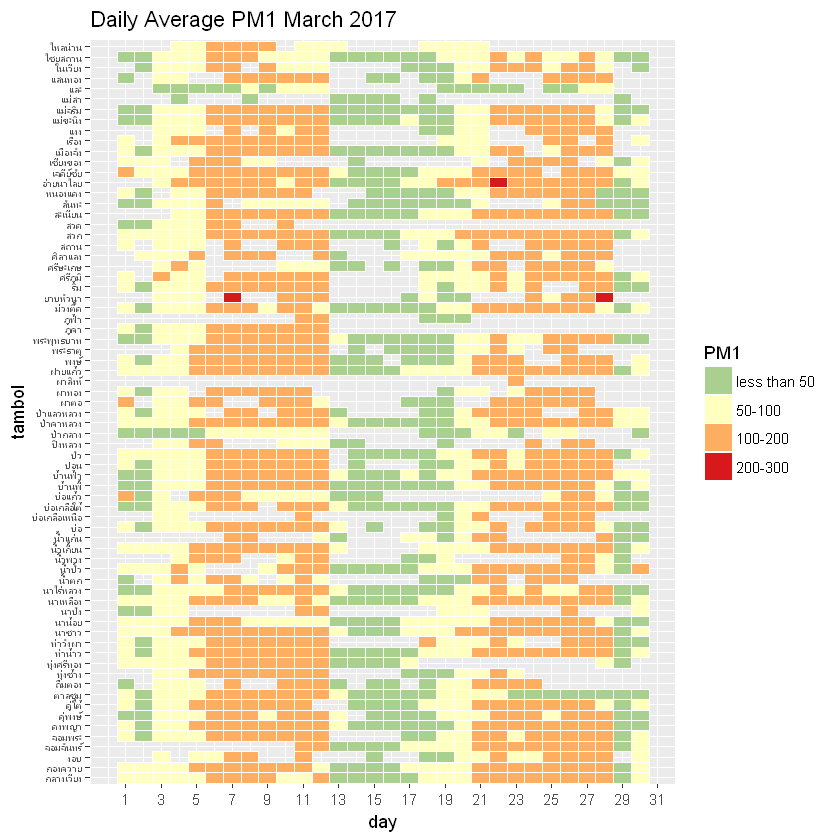

In [350]:
plot+labs(x = "day", y="tambol")+ggtitle("Daily Average PM1 March 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm1march.png")

Saving 6.67 x 6.67 in image


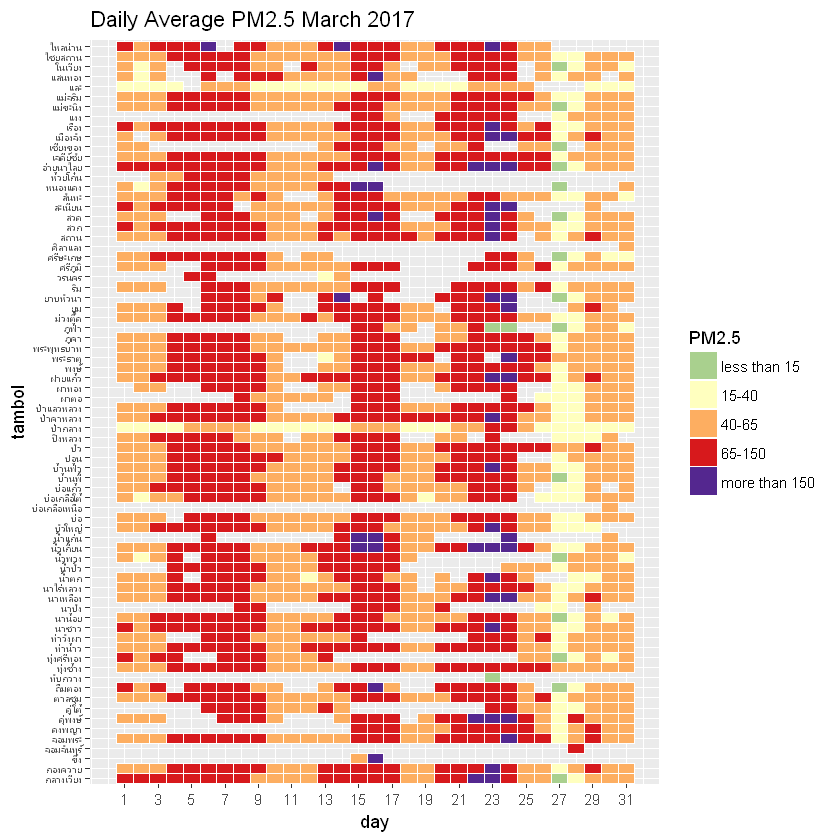

In [353]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 March 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))

ggsave("pm25march.png")

In [322]:
min(subairq$avgpm25)

[1] 0

Saving 6.67 x 6.67 in image


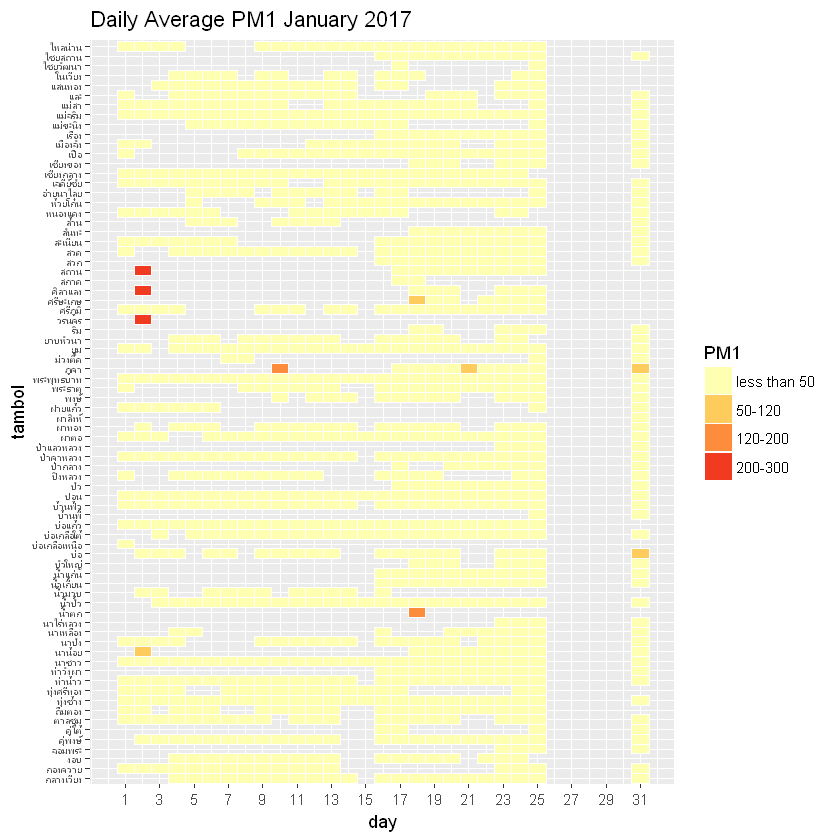

In [355]:
subairq<-sqldf('select * from airq where m=1')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 January 2017") +guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm1jan.png")

Saving 6.67 x 6.67 in image


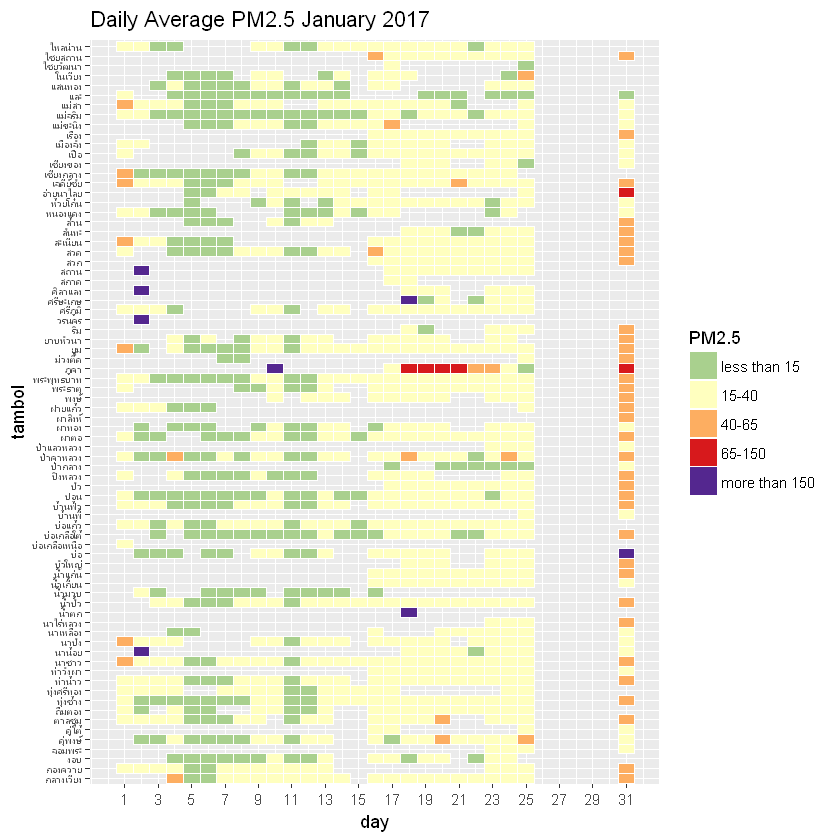

In [356]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 January 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25jan.png")

Saving 6.67 x 6.67 in image


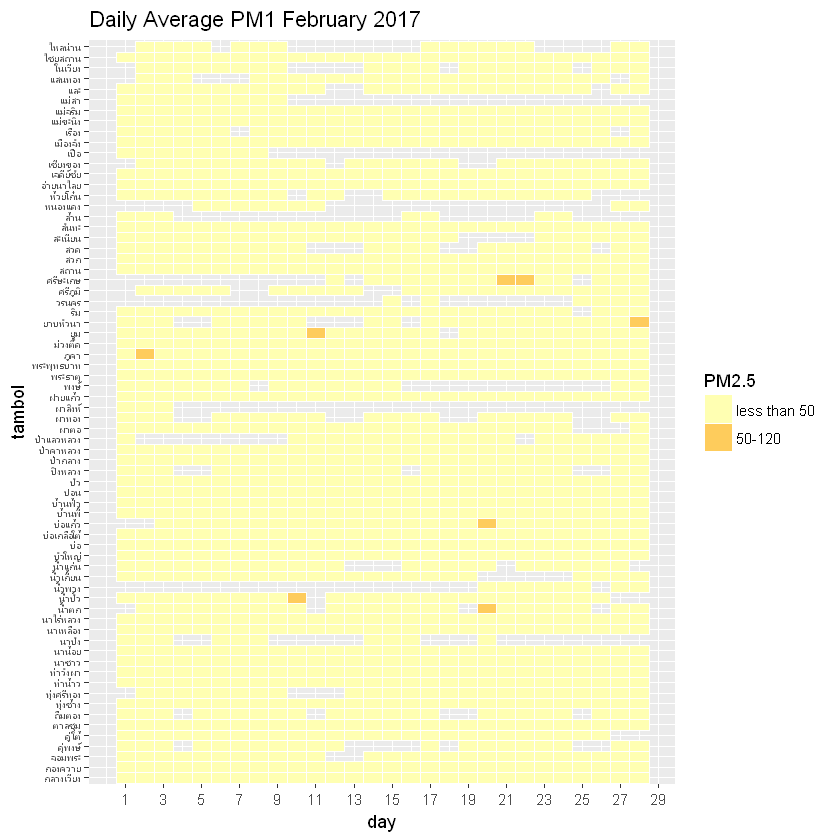

In [357]:
subairq<-sqldf('select * from airq where m=2')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 February 2017")+guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1feb.png")

Saving 6.67 x 6.67 in image


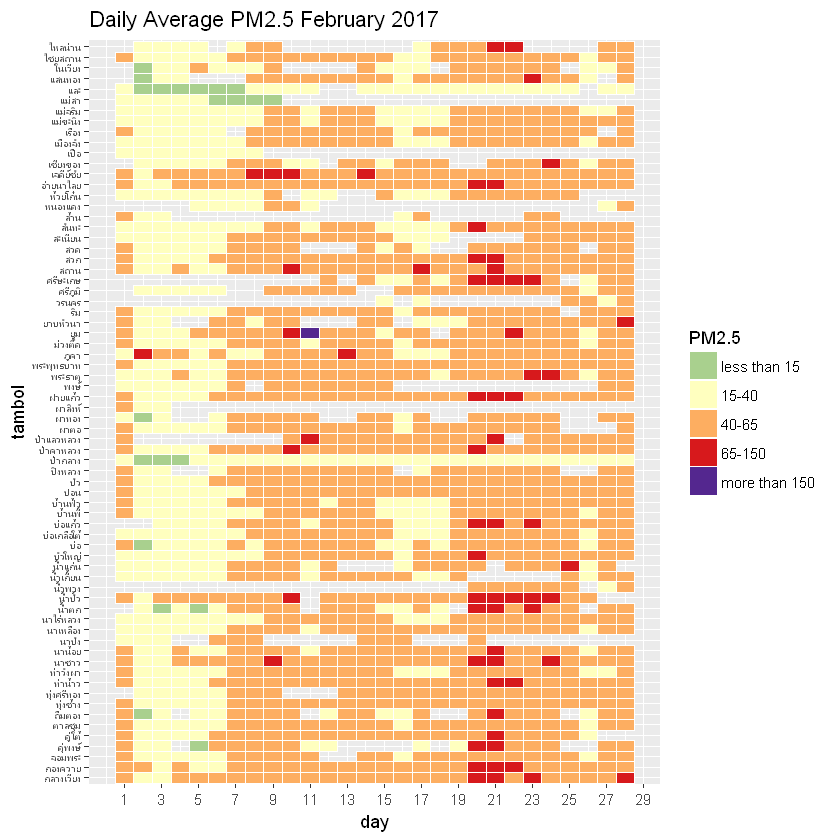

In [358]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 February 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25feb.png")

Saving 6.67 x 6.67 in image


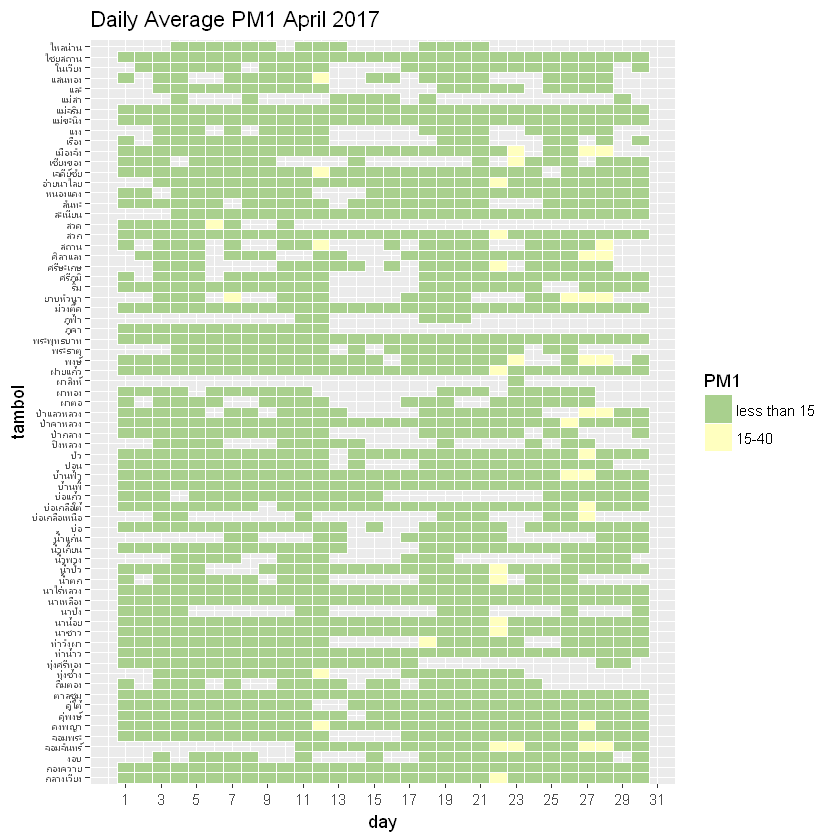

In [359]:
subairq<-sqldf('select * from airq where m=4')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM1 April 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1april.png")

Saving 6.67 x 6.67 in image


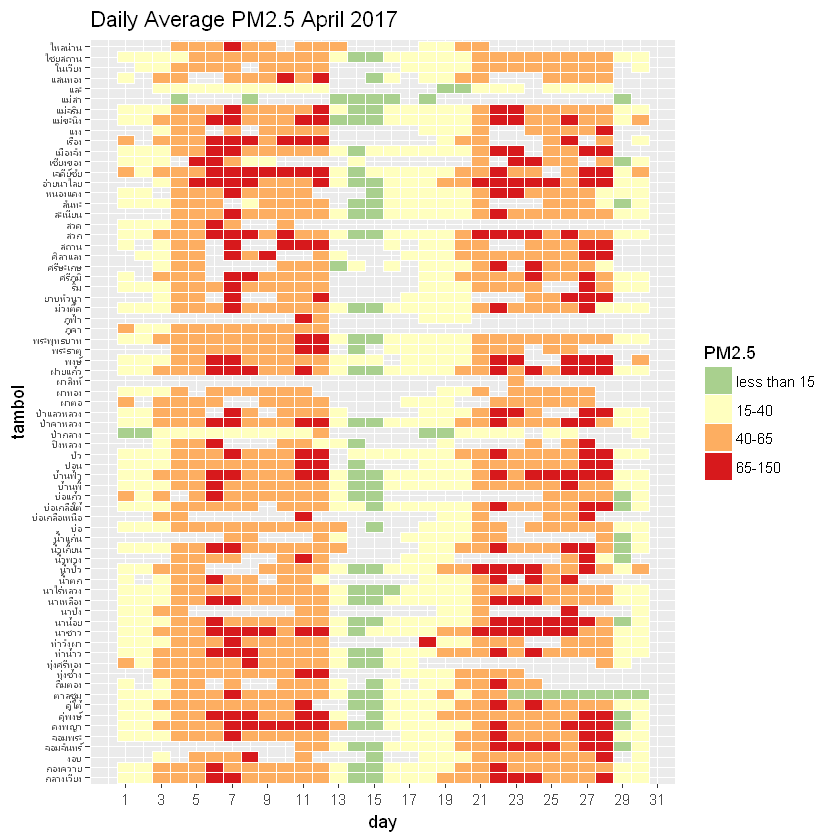

In [360]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 April 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25apr.png")

Saving 6.67 x 6.67 in image


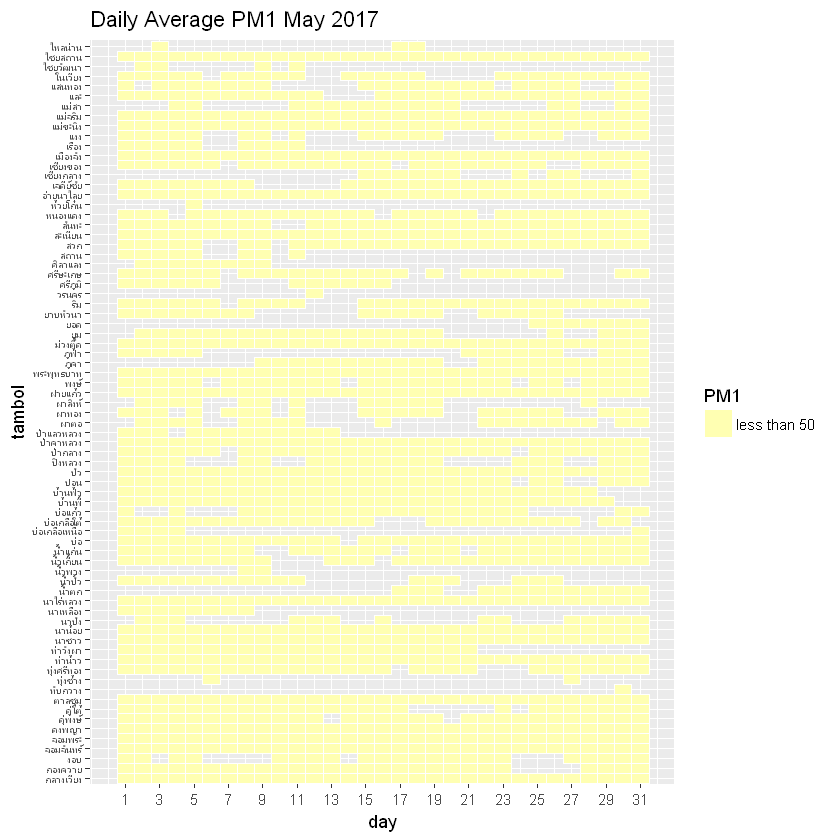

In [361]:
subairq<-sqldf('select * from airq where m=5')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 May 2017") +guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm1may.png")

Saving 6.67 x 6.67 in image


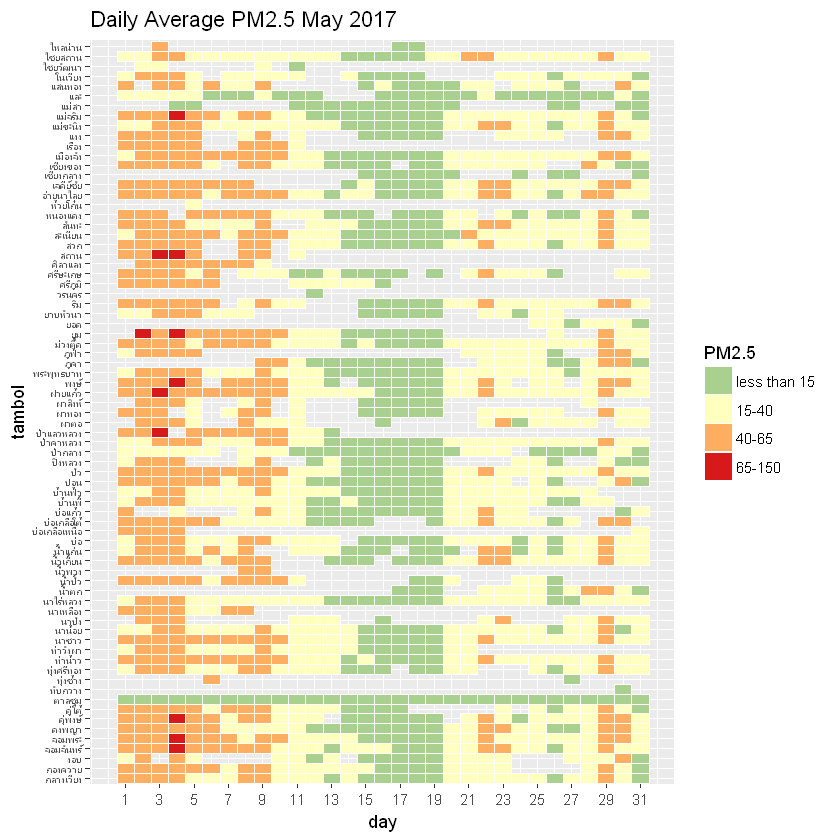

In [362]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 May 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25may.png")

Saving 6.67 x 6.67 in image


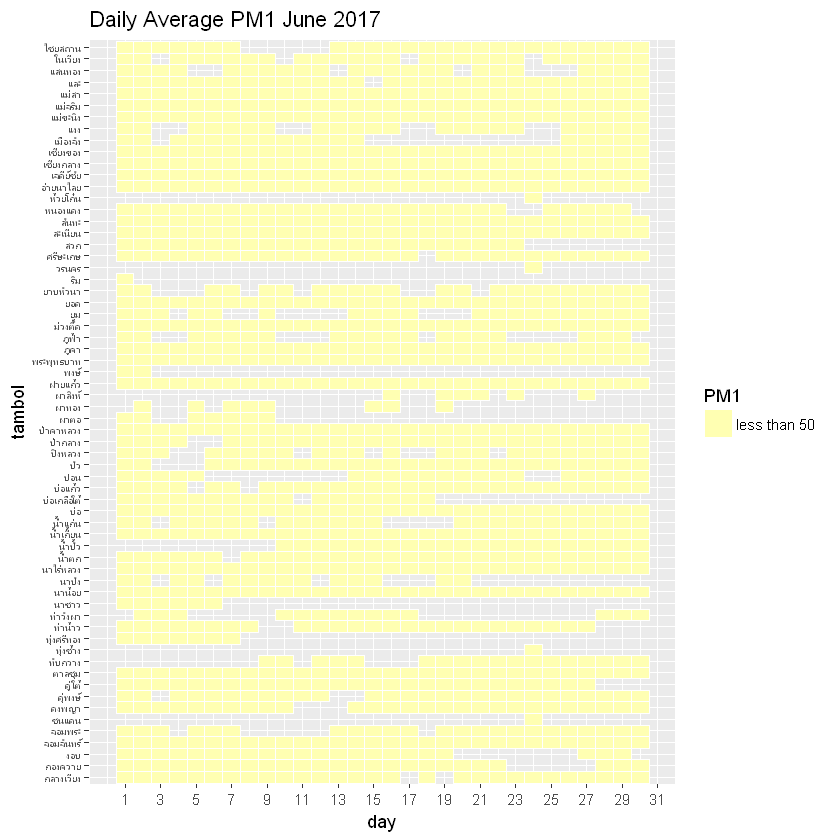

In [363]:
subairq<-sqldf('select * from airq where m=6')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 June 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1june.png")

Saving 6.67 x 6.67 in image


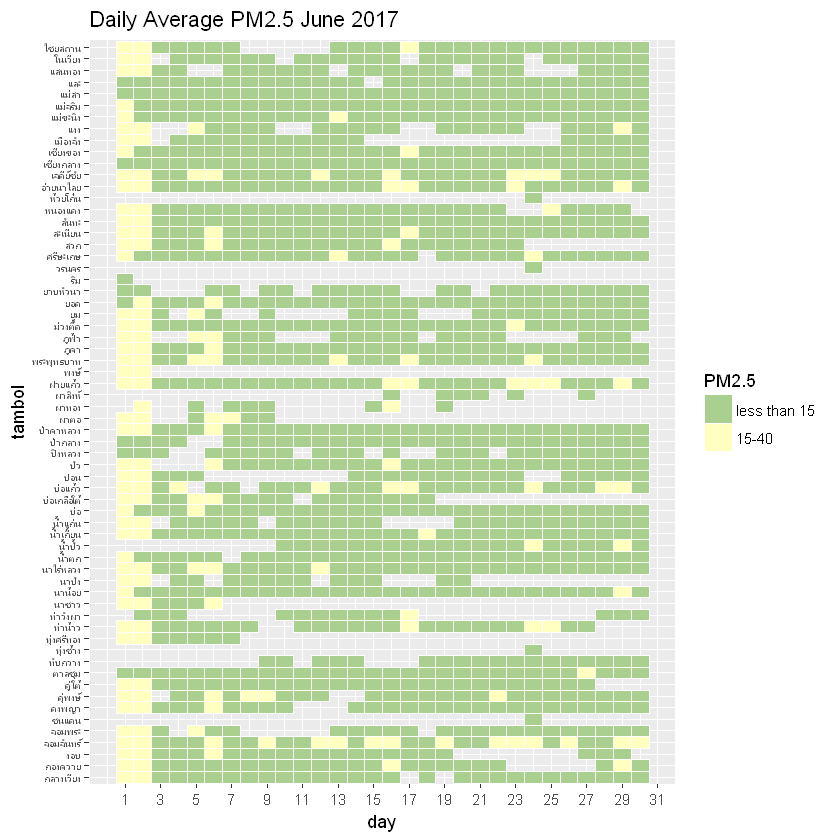

In [365]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 June 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25june.png")

Saving 6.67 x 6.67 in image


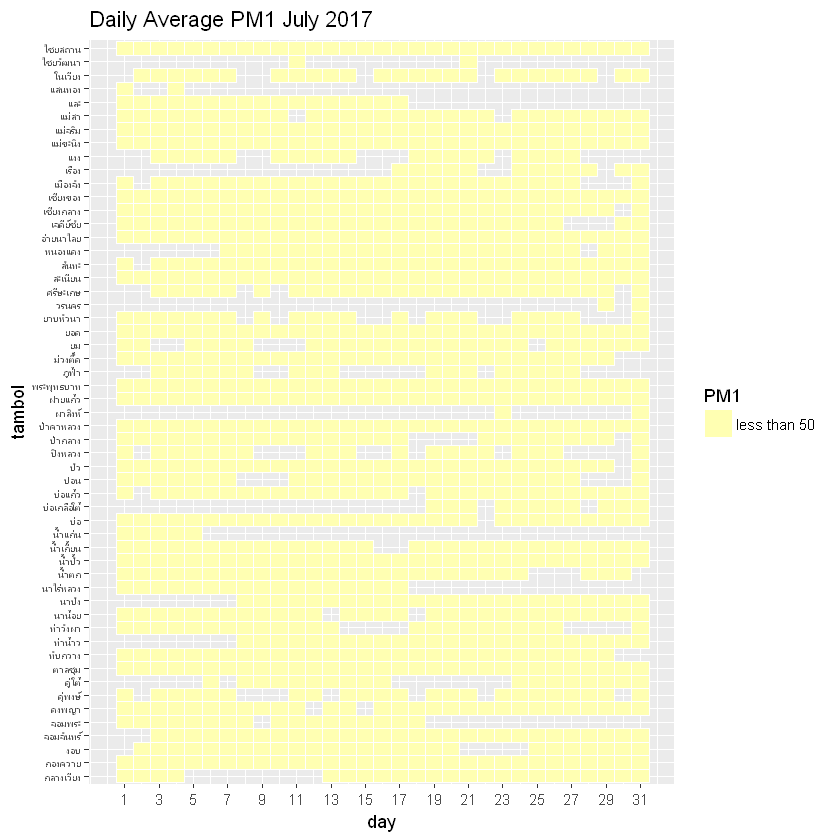

In [366]:
subairq<-sqldf('select * from airq where m=7')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))
plot+labs(x = "day")+ggtitle("Daily Average PM1 July 2017")+guides(fill = guide_legend(title="PM1"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31)) 
ggsave("pm1july.png")

Saving 6.67 x 6.67 in image


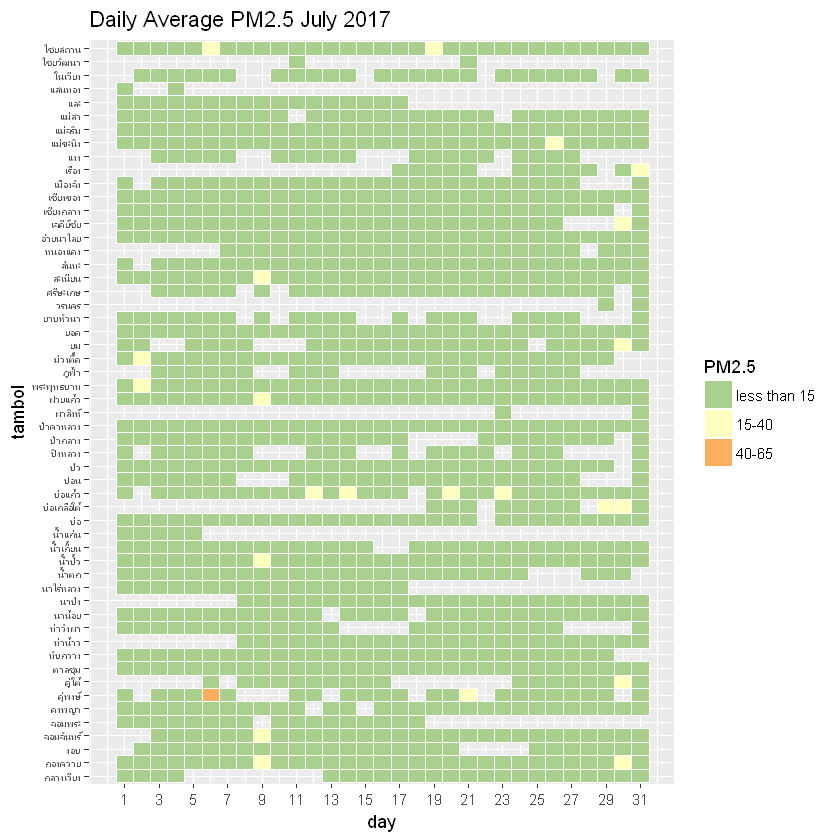

In [367]:
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm25cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc2.5
plot+labs(x = "day")+ggtitle("Daily Average PM2.5 July 2017") +guides(fill = guide_legend(title="PM2.5"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm25july.png")

Saving 6.67 x 6.67 in image


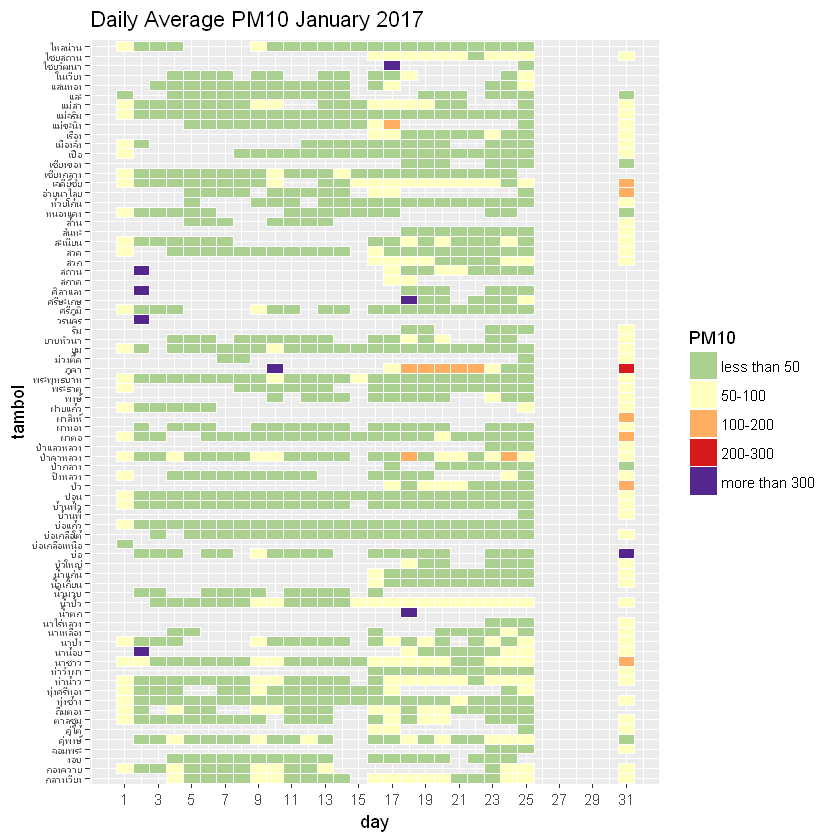

In [368]:
subairq<-sqldf('select * from airq where m=1')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 January 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10jan.png")

Saving 6.67 x 6.67 in image


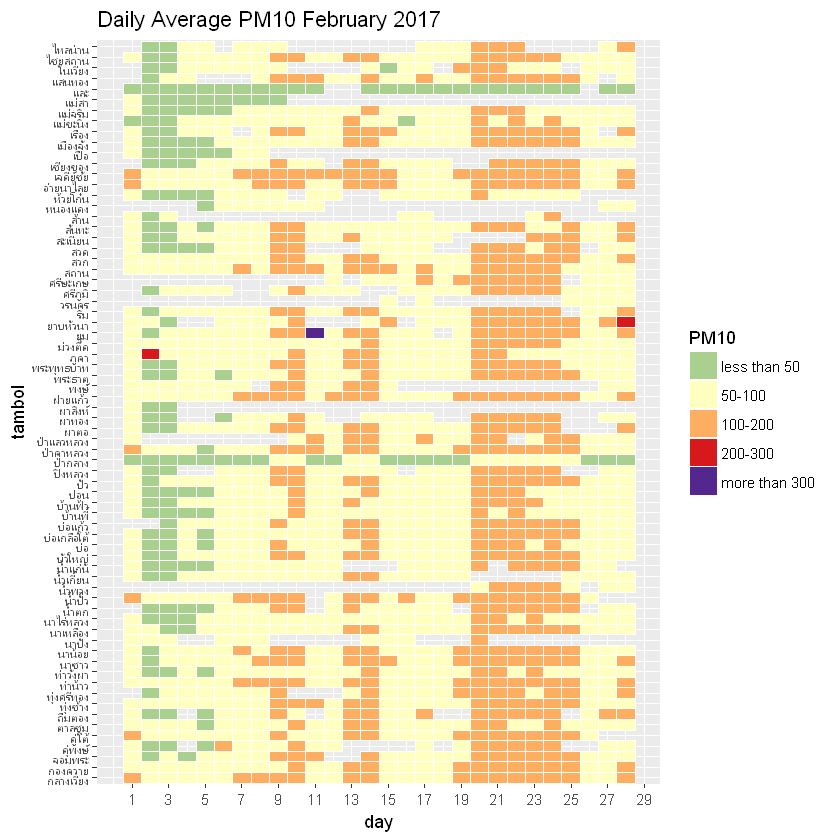

In [369]:
subairq<-sqldf('select * from airq where m=2')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 February 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10feb.png")

Saving 6.67 x 6.67 in image


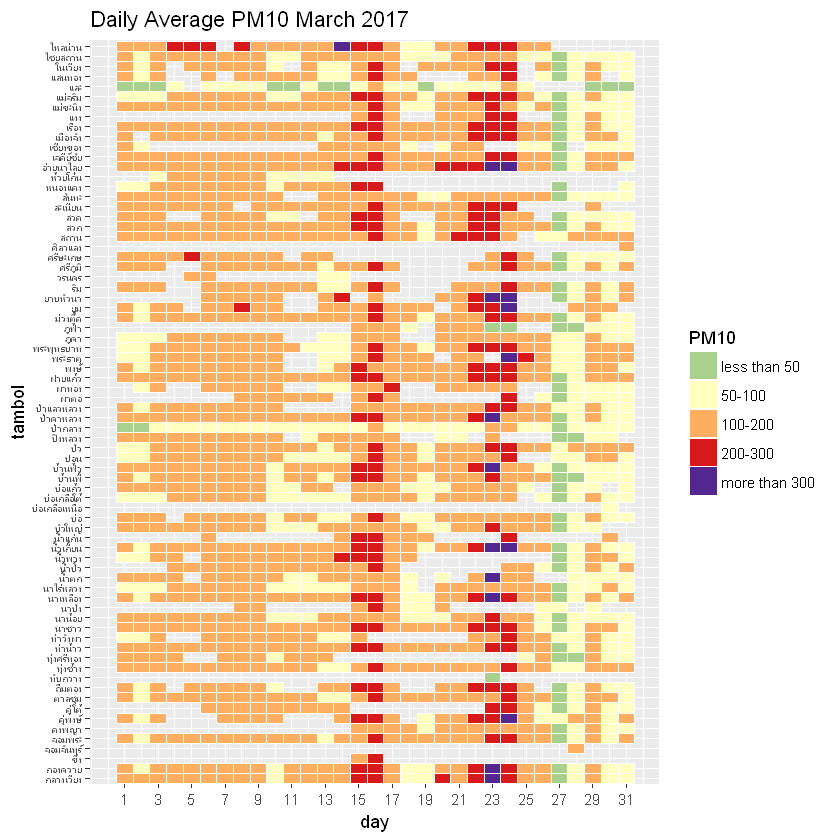

In [370]:
subairq<-sqldf('select * from airq where m=3')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 March 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10mar.png")

Saving 6.67 x 6.67 in image


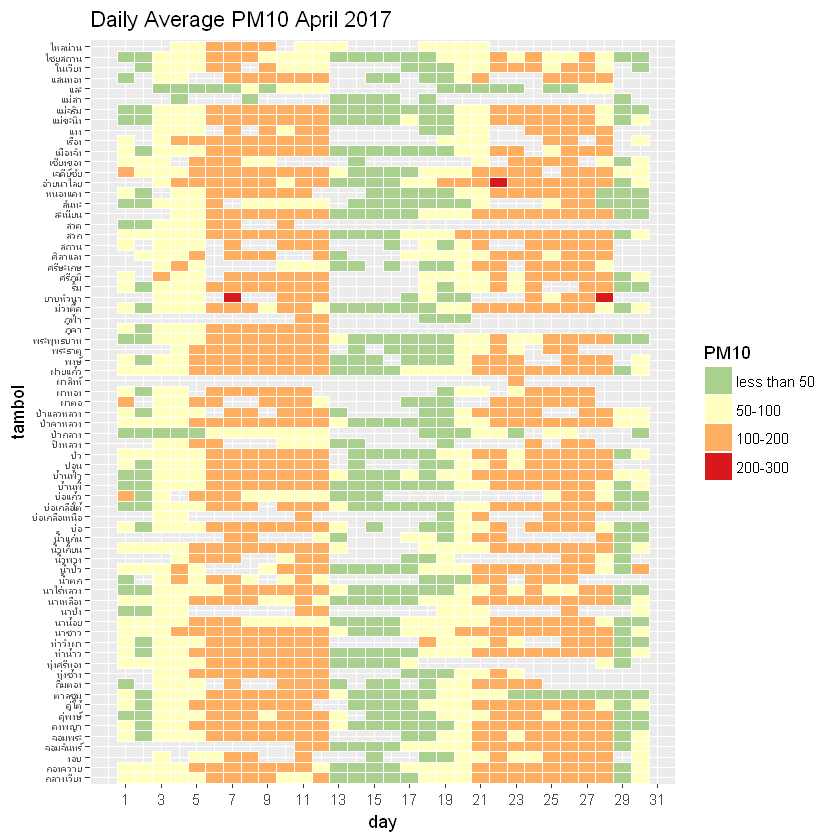

In [371]:
subairq<-sqldf('select * from airq where m=4')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 April 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10april.png")

Saving 6.67 x 6.67 in image


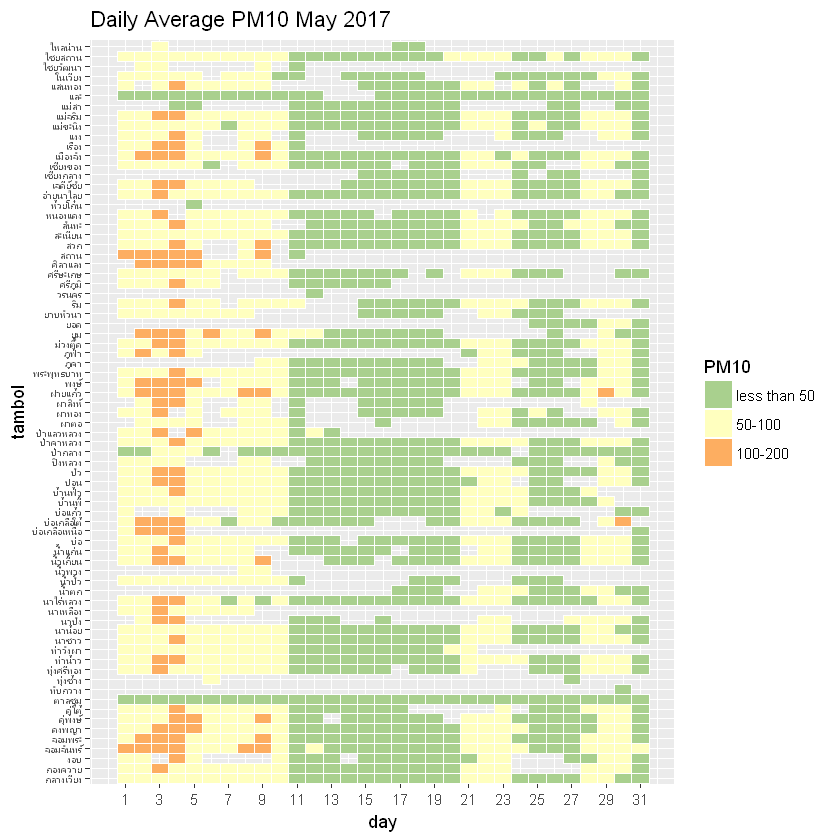

In [372]:
subairq<-sqldf('select * from airq where m=5')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 May 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10may.png")

Saving 6.67 x 6.67 in image


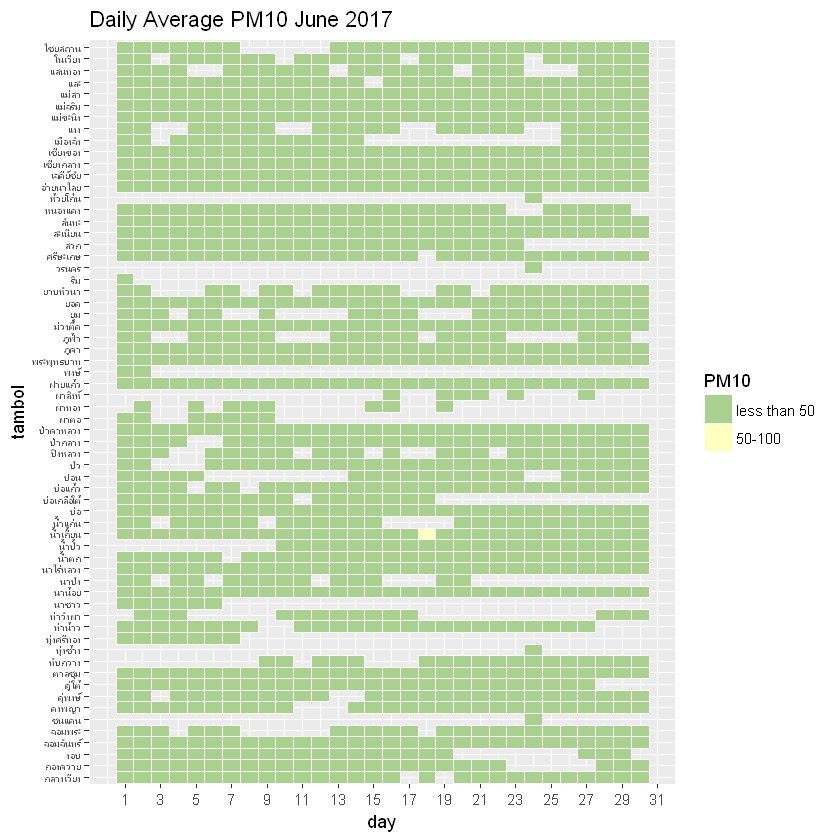

In [373]:
subairq<-sqldf('select * from airq where m=6')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 June 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10june.png")

Saving 6.67 x 6.67 in image


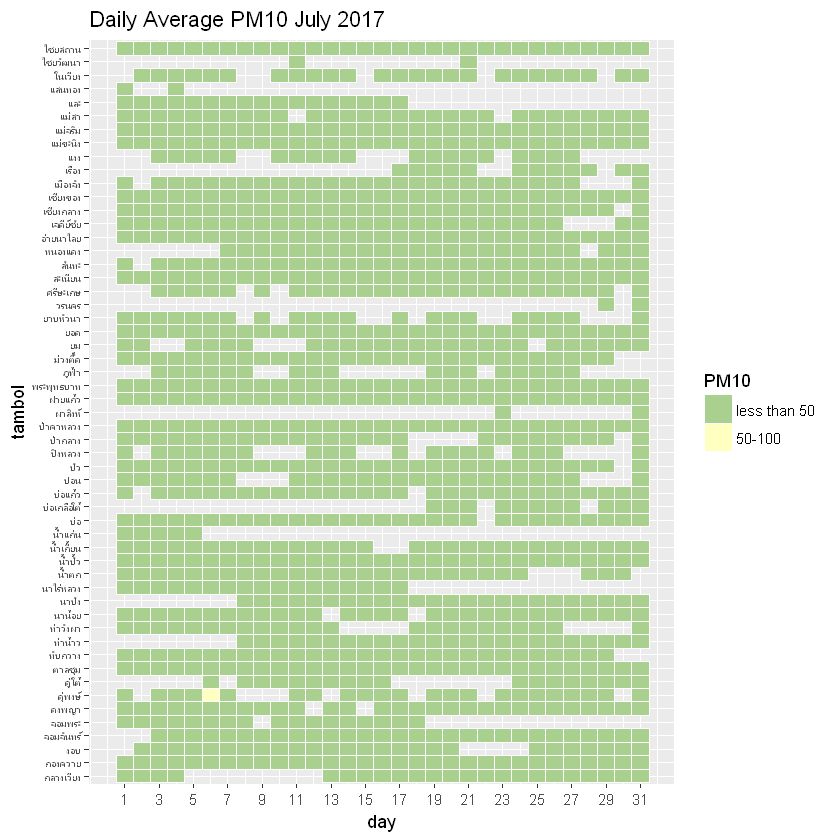

In [374]:
subairq<-sqldf('select * from airq where m=7')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 July 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10july.png")

Saving 6.67 x 6.67 in image


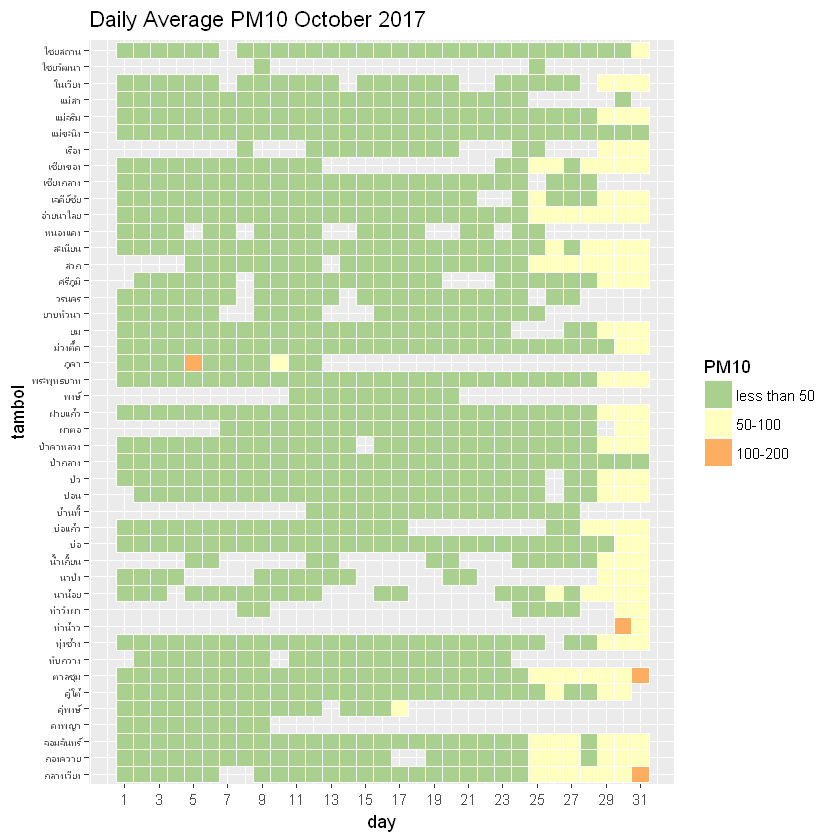

In [375]:
subairq<-sqldf('select * from airq where m=10')
plot<-ggplot(subairq, aes(d,tambol)) +geom_tile(aes(fill = pm10cat),colour="white")+theme (axis.text.y = element_text(size=6))+ cc10
plot+labs(x = "day")+ggtitle("Daily Average PM10 October 2017")+guides(fill = guide_legend(title="PM10"))+scale_x_continuous(breaks=c(1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31))
ggsave("pm10oct.png")

In [342]:
min(airq$avgpm1)
max(airq$avgpm1)
min(airq$avgpm25)
max(airq$avgpm25)
min(airq$avgpm10)
max(airq$avgpm10)

[1] 0

[1] 279.85

[1] 0

[1] 1132.087

[1] 0

[1] 3972.66

Choose some tambol in the middle of Nan to plot violin

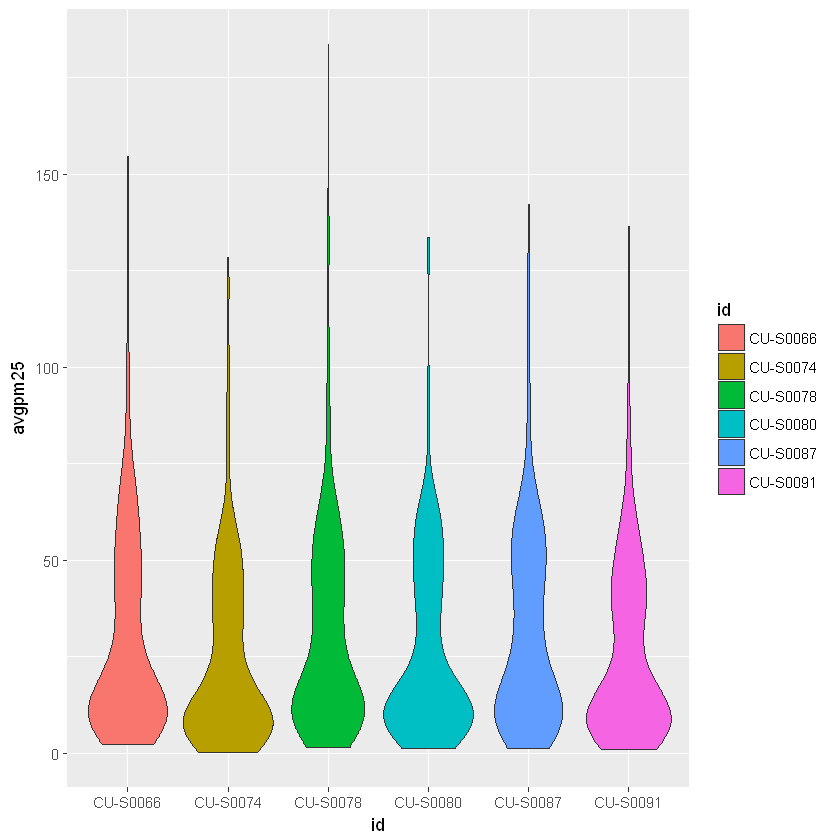

In [343]:
airqsub<-sqldf('select * from airq where id="CU-S0074" or id="CU-S0066" or id="CU-S0091" or id="CU-S0087" or id="CU-S0080" or id="CU-S0078"')
p <- ggplot(airqsub, aes(id,avgpm25))
p + geom_violin(aes(fill=id))